<font size=4> We demonstrate some examples using monte carlo methods to update the policy and 
feel free to implement your own agent by modifiying the source code we import below.

In [1]:
from rlp.monte_carlo.base import BlackJackEnv, BlackJackEnvES, NaiveBlackJackAgent, AdvancedBlackJackAgent
from rlp.monte_carlo.base import IN_PROGRESS, TERMINAL, DECK

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Monte Carlo Policy Evaluation
<font size=4> An experiment here would be run accroding to the description on textbook page 93, i.e. the [Black Jack](https://en.wikipedia.org/wiki/Blackjack) Problem. We are going to try to reproduce the example of **First-visit MC prediction**, for estimating $V \approx v_{\pi}$.

In [3]:
def parse_state_value(V):
    """parse state value from the give agent.
    """
    ret = {}
    for k in range(2):
        ret[k] = np.zeros((10, 10))
        for i in range(10):
            for j in range(10):
                usable_ace = k
                palyer_sum = i + 12
                dealer_show = DECK[j]
                ret[k][i][j] = V[(usable_ace, palyer_sum, dealer_show)]
    return ret

def draw_values(stats):
    """ draw state values like Figure 5.1 on textbook based on stats.
    """
    fig = plt.figure(figsize=(8, 4))
    for k in range(2):
        ax = fig.add_subplot(1, 2, k + 1, projection='3d')
        Z = stats[k]
        X, Y = np.meshgrid(np.arange(10), np.arange(10))
        ax.plot_surface(X, Y, Z, vmin=-1, vmax=1)
        ax.set_yticks(np.arange(10))
        ax.set_yticklabels(np.arange(10) + 12)
        ax.set_ylabel('player sum')
        
        ax.set_xticks(np.arange(10))
        ax.set_xticklabels(DECK)
        ax.set_xlabel('dealer show')

        ax.set_zlabel('v')
        title = 'no usable ace'if k == 0 else 'usable ace'
        ax.set_title(title)

In [4]:
def run_monte_carlo_pred(n_eposides=10000):
    """ Run experiment n_eposides times
    """
    # Naive Agent, sticks when the current sum is 20 or 21 otherwise hits
    agent = NaiveBlackJackAgent(discountRatio=0.99)   # u can tune the discount ratio here
    env = BlackJackEnv()

    for episode in range(n_eposides):
        state = env.reset()
        agent.reset()
        status = IN_PROGRESS
        while status != TERMINAL:
            agent.set_state(state)
            action = agent.action()
            reward, state, status = env.react(state, action)
            agent.set_experience(reward, state)
        agent.update()                                # agent upate after each episode is finished

    return agent.V                                    # return the state value

# run exp 10,000 times and 50,000 times
# stats_10K = run_monte_carlo_pred(10000)
# stats_50K = run_monte_carlo_pred(50000)

In [5]:
draw_values(parse_state_value(stats_10K))

NameError: name 'stats_10K' is not defined

<font size=4> state values are more smooth when runing 50,000 episodes

In [ ]:
draw_values(parse_state_value(stats_50K))

# Monte Carlo Control
<font size=4> Here we apply **Monte Carlo ES (Exploring Starts)** to the **BlackJack Problem**. NOTE: in order to implement ES, all initial state-action pairs are produced by a uniform distribution. More precisely, the action at timestep 0 comes from a uniform distribution $p(A_0=a|S_0=s)$, even though our policy $\pi(a|s)$ is not a uniform one.

In [6]:
def parse_policy(policy):
    """ parse the policy of agent
    """
    stats = {}
    def get_non_zero_key(d):
        return [k for k, v in d.items() if v != 0]
        
    for k in range(2):
        stats[k] = np.zeros((10, 10))
        for i in range(10):
            for j in range(10):
                usable_ace = k
                palyer_sum = i + 12
                dealer_show = DECK[j]
                stats[k][i][j] = get_non_zero_key(policy[(usable_ace, palyer_sum, dealer_show)])[0]
    return stats

In [7]:
def draw_policy(stats):
    """ plot result
    """
    %matplotlib inline
    _, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 12), sharey=True)
    ax = ax.ravel()
    for i in range(2):
        ax[i].imshow(stats[i])
        ax[i].invert_yaxis()
        
        ax[i].set_yticks(range(10))
        ax[i].set_yticklabels(np.arange(10) + 12)
        if i == 0:
            ax[i].set_ylabel('player sum')

        ax[i].set_xticks(range(10))
        ax[i].set_xticklabels(DECK)
        ax[i].set_xlabel('dealer show')
        
        ax[i].grid()
        title = 'usable_ace' if i else 'no usable_ace'
        ax[i].set_title(title)
        

    plt.show()

In [10]:
agent = AdvancedBlackJackAgent(discountRatio=1)
env = BlackJackEnvES()

for episode in range(100000):
    state = env.reset()
    agent.reset()
    status = IN_PROGRESS
    while status != TERMINAL:
        agent.set_state(state)
        action = agent.action()
        reward, state, status = env.react(state, action)
        agent.set_experience(reward, state)
    agent.update()

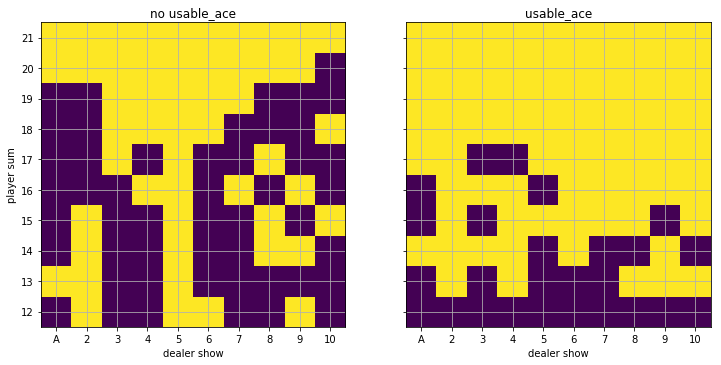

In [11]:
stats = parse_policy(agent.policy)
draw_policy(stats)